In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
# Load the dataset
df = pd.read_excel('COVID-19 Daily.xlsx')
df.head(60)

,Date,Daily Tests,Daily Cases,Daily Recoveries,Daily Deaths
0,2020-02-26,NaN,0.0,NaN,NaN
1,2020-02-27,NaN,NaN,NaN,NaN
2,2020-02-28,NaN,NaN,NaN,NaN
3,2020-02-29,NaN,0.0,NaN,NaN
4,2020-03-01,NaN,NaN,NaN,NaN
5,2020-03-02,NaN,NaN,NaN,NaN
6,2020-03-03,NaN,NaN,NaN,NaN
7,2020-03-04,NaN,NaN,NaN,NaN
8,2020-03-05,NaN,NaN,NaN,NaN
9,2020-03-06,NaN,NaN,NaN,NaN


In [24]:
# Check for null values, column info, and descriptive statistics
print(df.isnull().sum())

Date                 0
Daily Tests         13
Daily Cases         11
Daily Recoveries    15
Daily Deaths        57
dtype: int64


In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              188 non-null    datetime64[ns]
 1   Daily Tests       175 non-null    float64       
 2   Daily Cases       177 non-null    float64       
 3   Daily Recoveries  173 non-null    float64       
 4   Daily Deaths      131 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.5 KB
None


In [26]:
print(df.describe())

                      Date   Daily Tests  Daily Cases  Daily Recoveries  \
count                  188    175.000000   177.000000        173.000000   
mean   2020-05-29 12:00:00  14927.297143  1673.028249       1590.930636   
min    2020-02-26 00:00:00      0.000000     0.000000          0.000000   
25%    2020-04-12 18:00:00   6403.500000   432.000000        172.000000   
50%    2020-05-29 12:00:00  16387.000000   990.000000        677.000000   
75%    2020-07-15 06:00:00  22975.000000  2603.000000       2041.000000   
max    2020-08-31 00:00:00  31681.000000  6825.000000      16813.000000   
std                    NaN   9259.243109  1681.158547       2490.639106   

       Daily Deaths  
count    131.000000  
mean      42.511450  
min        0.000000  
25%        7.000000  
50%       32.000000  
75%       70.500000  
max      153.000000  
std       38.332426  


In [27]:
# Calculate total tests till September 01, 2020
total_tests = df['Daily Tests'].sum()
print(f"Total tests performed till September 01, 2020: {total_tests}")

Total tests performed till September 01, 2020: 2612277.0


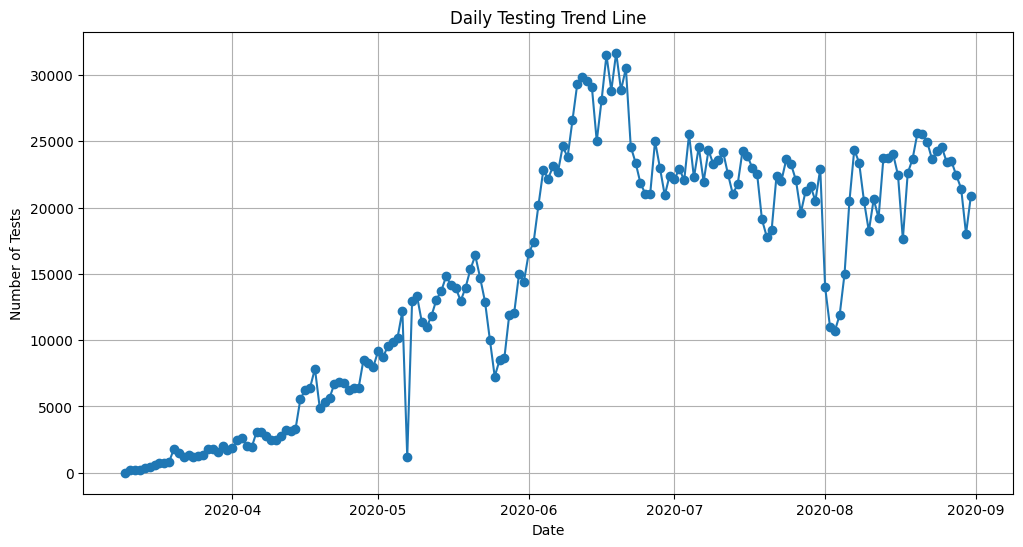

In [28]:
# Plotting Daily Testing Trend Line Graph
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Daily Tests'], marker='o')
plt.title('Daily Testing Trend Line')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.grid(True)
plt.show()

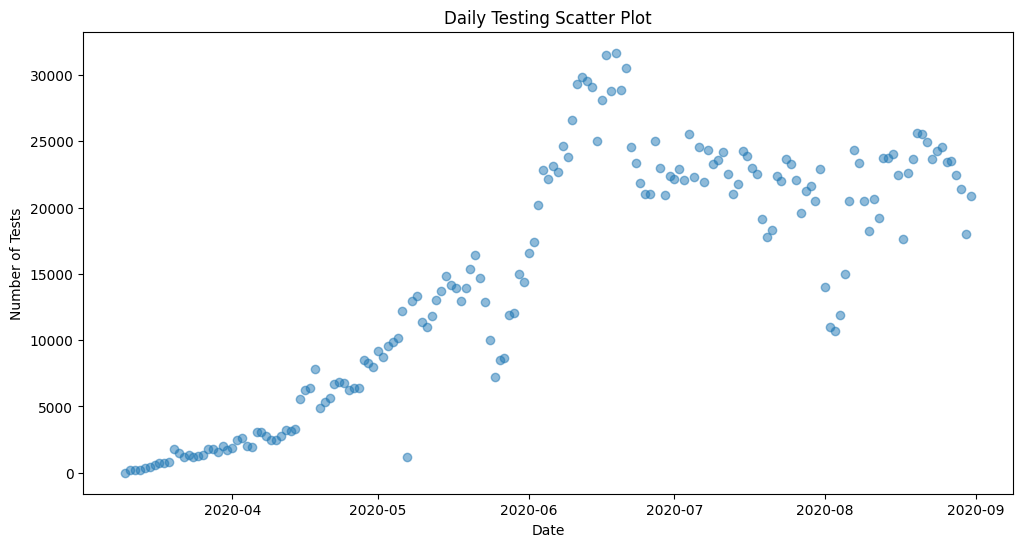

In [29]:
# Scatter Diagram for Daily Testing
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Daily Tests'], alpha=0.5)
plt.title('Daily Testing Scatter Plot')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.show()

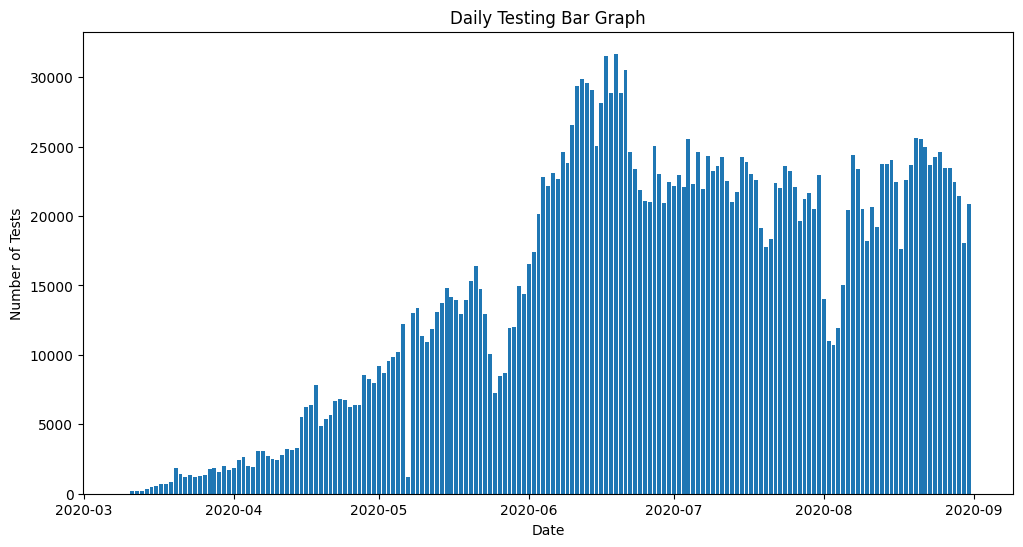

In [30]:
# Bar Graph for Daily Testing
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Daily Tests'])
plt.title('Daily Testing Bar Graph')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.show()

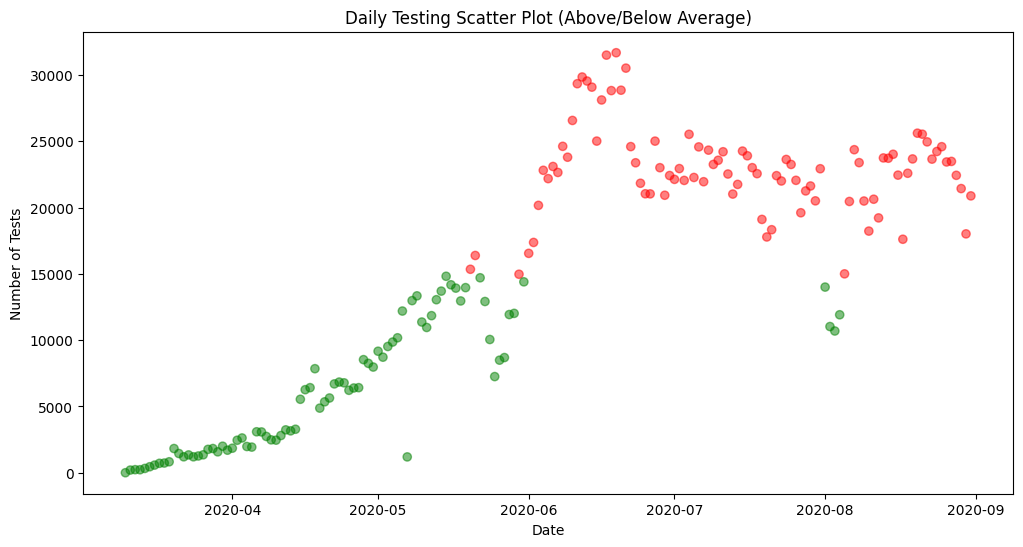

In [31]:
# Scatter diagram with above-average (red) and below-average (green) daily testing
average_tests = df['Daily Tests'].mean()
plt.figure(figsize=(12, 6))
plt.scatter(df['Date'], df['Daily Tests'], c=np.where(df['Daily Tests'] > average_tests, 'red', 'green'), alpha=0.5)
plt.title('Daily Testing Scatter Plot (Above/Below Average)')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.show()

In [32]:
# Convert dataset to weekly stats
df_weekly = df.resample('W', on='Date').sum()

# Convert dataset to monthly stats
df_monthly = df.resample('M', on='Date').sum()

# Save weekly and monthly stats
df_weekly.to_csv('weekly_stats.csv')
df_monthly.to_csv('monthly_stats.csv')

C:\Users\SalmanPC\AppData\Local\Temp\ipykernel_4712\3632178024.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M', on='Date').sum()


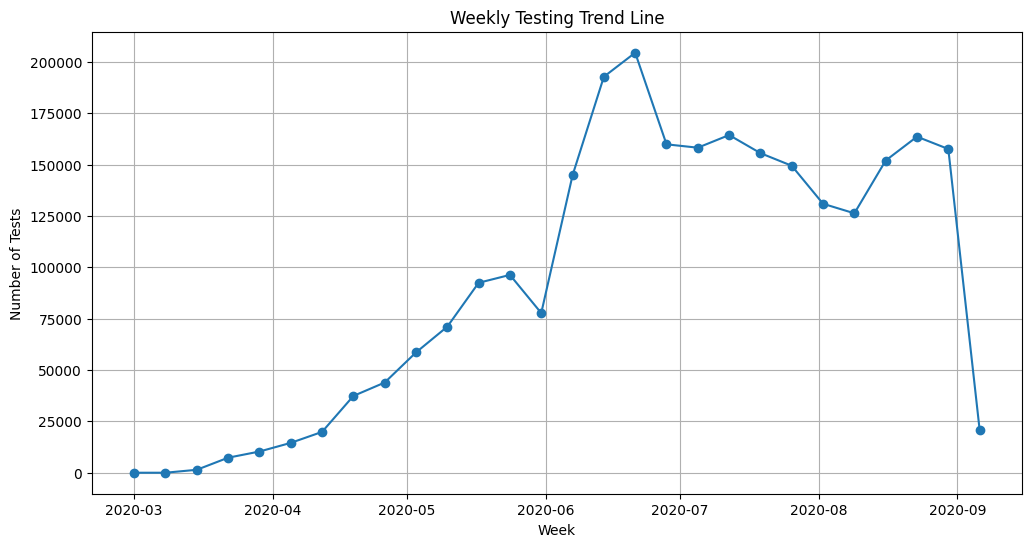

In [33]:
# Plotting Weekly Testing Trend Line Graph
plt.figure(figsize=(12, 6))
plt.plot(df_weekly.index, df_weekly['Daily Tests'], marker='o')
plt.title('Weekly Testing Trend Line')
plt.xlabel('Week')
plt.ylabel('Number of Tests')
plt.grid(True)
plt.show()

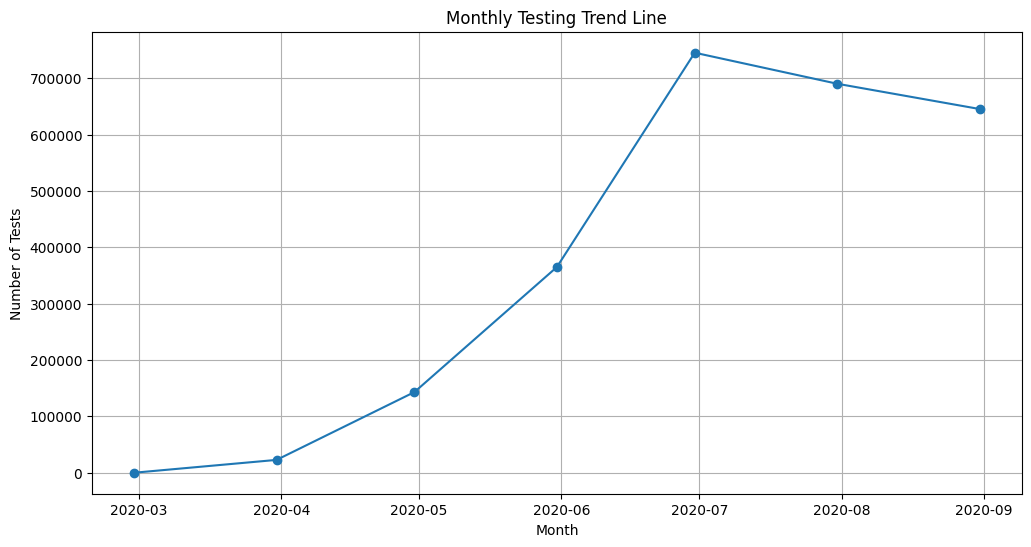

In [34]:
# Plotting Monthly Testing Trend Line Graph
plt.figure(figsize=(12, 6))
plt.plot(df_monthly.index, df_monthly['Daily Tests'], marker='o')
plt.title('Monthly Testing Trend Line')
plt.xlabel('Month')
plt.ylabel('Number of Tests')
plt.grid(True)
plt.show()

In [35]:
# Max and Min number of weekly & monthly tests, cases, recoveries, and deaths with dates
max_weekly_tests = df_weekly['Daily Tests'].idxmax(), df_weekly['Daily Tests'].max()
min_weekly_tests = df_weekly['Daily Tests'].idxmin(), df_weekly['Daily Tests'].min()

max_monthly_tests = df_monthly['Daily Tests'].idxmax(), df_monthly['Daily Tests'].max()
min_monthly_tests = df_monthly['Daily Tests'].idxmin(), df_monthly['Daily Tests'].min()


In [36]:
print(f"Max weekly tests: {max_weekly_tests}")
print(f"Min weekly tests: {min_weekly_tests}")
print(f"Max monthly tests: {max_monthly_tests}")
print(f"Min monthly tests: {min_monthly_tests}")

Max weekly tests: (Timestamp('2020-06-21 00:00:00'), np.float64(204512.0))
Min weekly tests: (Timestamp('2020-03-01 00:00:00'), np.float64(0.0))
Max monthly tests: (Timestamp('2020-06-30 00:00:00'), np.float64(745419.0))
Min monthly tests: (Timestamp('2020-02-29 00:00:00'), np.float64(0.0))


In [42]:
# Calculate Per Thousand & Million stats for daily tests, cases, recoveries, and deaths
population = 220_892_340  # Population of Pakistan (2020 est.)

df['Tests per Thousand'] = df['Daily Tests'] / (population / 1000)
df['Cases per Thousand'] = df['Daily Cases'] / (population / 1000)
df['Recoveries per Thousand'] = df['Daily Recoveries'] / (population / 1000)
df['Deaths per Thousand'] = df['Daily Deaths'] / (population / 1000)

df['Tests per Million'] = df['Daily Tests'] / (population / 1_000_000)
df['Cases per Million'] = df['Daily Cases'] / (population / 1_000_000)
df['Recoveries per Million'] = df['Daily Recoveries'] / (population / 1_000_000)
df['Deaths per Million'] = df['Daily Deaths'] / (population / 1_000_000)

print(df.tail(60))

          Date  Daily Tests  Daily Cases  Daily Recoveries  Daily Deaths  \
128 2020-07-03      22050.0       3387.0           11471.0          68.0   
129 2020-07-04      25527.0       3191.0            4736.0          93.0   
130 2020-07-05      22271.0       3344.0            1819.0          50.0   
131 2020-07-06      24577.0       2691.0            3308.0          77.0   
132 2020-07-07      21951.0       2980.0            6008.0          83.0   
133 2020-07-08      24333.0       3359.0            4346.0          61.0   
134 2020-07-09      23255.0       2751.0            3781.0          75.0   
135 2020-07-10      23569.0       2752.0            4042.0          65.0   
136 2020-07-11      24211.0       2505.0            3566.0          74.0   
137 2020-07-12      22532.0       2769.0            5217.0          73.0   
138 2020-07-13      21020.0       1979.0            8739.0          50.0   
139 2020-07-14      21749.0       2165.0            2154.0          67.0   
140 2020-07-

In [38]:
# Train and implement ML model to predict the future trend of daily cases and deaths
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [44]:
# Prepare the data for modeling
X = np.array((df['Date'] - df['Date'].min()).dt.days).reshape(-1, 1)  # Days since first date
y_cases = df['Daily Cases'].values
y_deaths = df['Daily Deaths'].values

In [48]:
# Handle missing values by filling with the mean of the respective columns (or any other strategy)
y_cases = np.nan_to_num(y_cases, nan=np.nanmean(y_cases))
y_deaths = np.nan_to_num(y_deaths, nan=np.nanmean(y_deaths))

In [53]:
# Split data into training and test sets (for both cases and deaths)
X_train, X_test, y_cases_train, y_cases_test = train_test_split(X, y_cases, test_size=0.2, random_state=42)
_, _, y_deaths_train, y_deaths_test = train_test_split(X, y_deaths, test_size=0.2, random_state=42)

In [54]:
# Linear Regression model for daily cases
model_cases = LinearRegression()
model_cases.fit(X_train, y_cases_train)
y_cases_pred = model_cases.predict(X_test)

In [55]:
# Linear Regression model for daily deaths
model_deaths = LinearRegression()
model_deaths.fit(X_train, y_deaths_train)
y_deaths_pred = model_deaths.predict(X_test)

In [56]:
# Evaluation
mse_cases = mean_squared_error(y_cases_test, y_cases_pred)
mse_deaths = mean_squared_error(y_deaths_test, y_deaths_pred)

print(f"Mean Squared Error for Cases Model: {mse_cases}")
print(f"Mean Squared Error for Deaths Model: {mse_deaths}")

Mean Squared Error for Cases Model: 2734638.189993328
Mean Squared Error for Deaths Model: 979.8744023620283


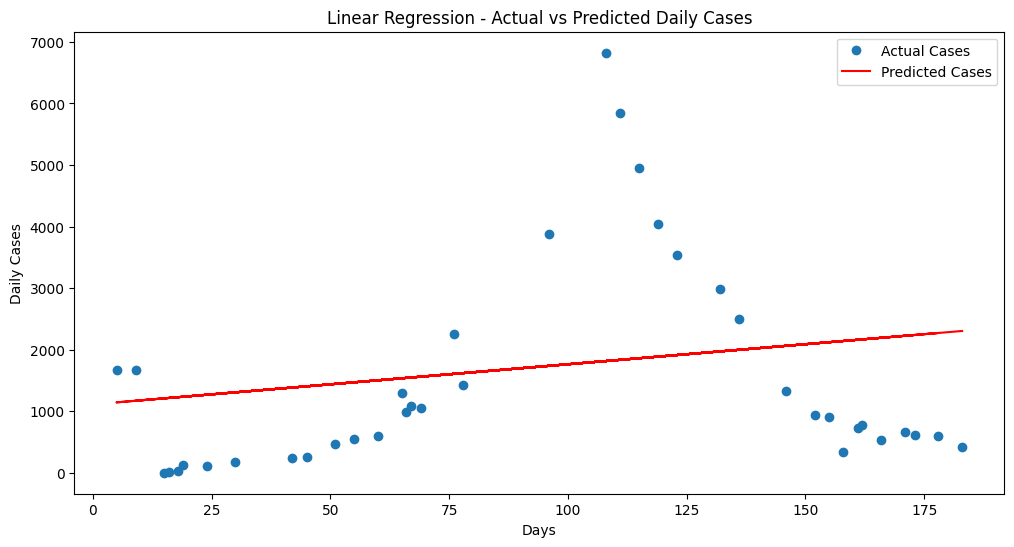

In [57]:
# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(X_test, y_cases_test, 'o', label='Actual Cases')
plt.plot(X_test, y_cases_pred, 'r-', label='Predicted Cases')
plt.title('Linear Regression - Actual vs Predicted Daily Cases')
plt.xlabel('Days')
plt.ylabel('Daily Cases')
plt.legend()
plt.show()

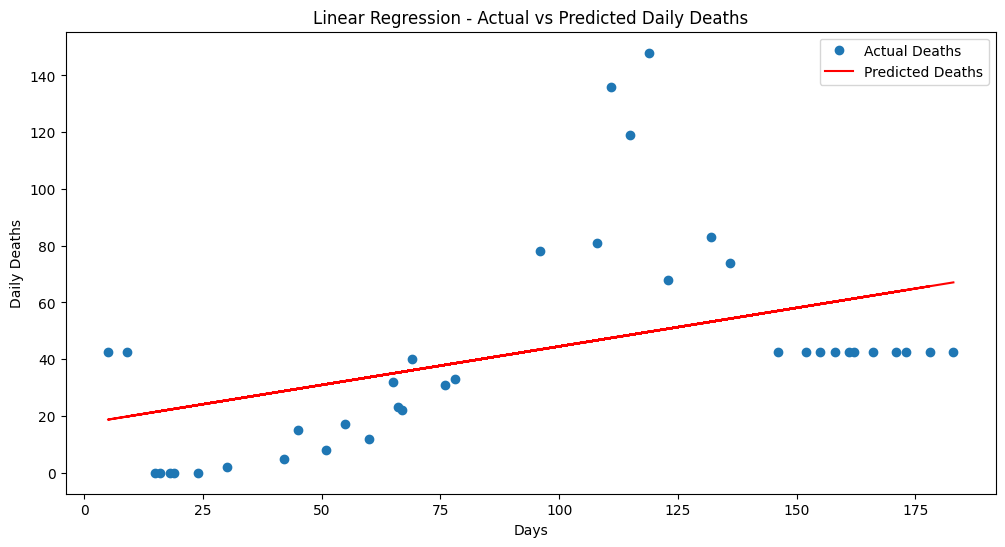

In [58]:
plt.figure(figsize=(12, 6))
plt.plot(X_test, y_deaths_test, 'o', label='Actual Deaths')
plt.plot(X_test, y_deaths_pred, 'r-', label='Predicted Deaths')
plt.title('Linear Regression - Actual vs Predicted Daily Deaths')
plt.xlabel('Days')
plt.ylabel('Daily Deaths')
plt.legend()
plt.show()